In [1]:
#pip install openpyxl

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('data.xlsx')

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
import missingno as msno

<AxesSubplot:>

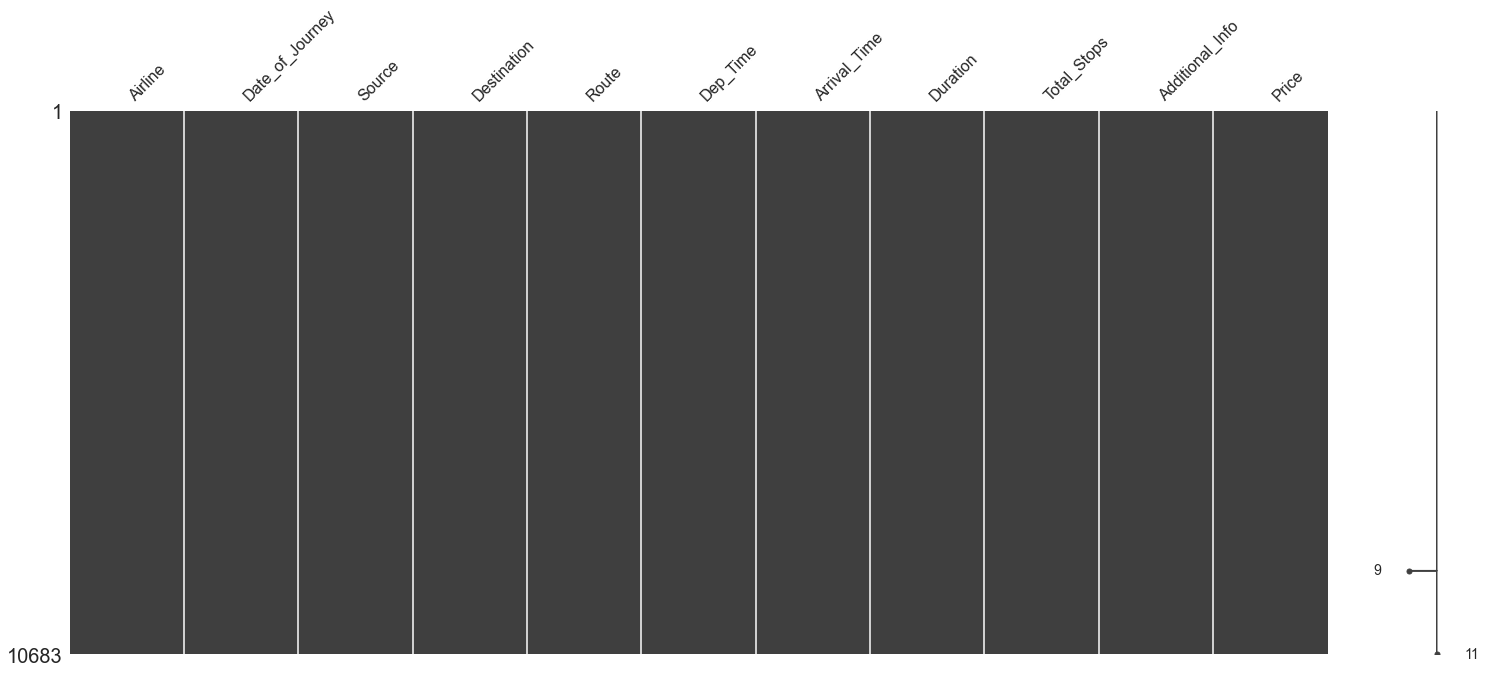

In [8]:
msno.matrix(data)

In [9]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
data[data['Route'].isna()] 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
data[data['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [12]:
data.shape

(10683, 11)

In [13]:
data = data.drop(data.index[9039])
data.shape

(10682, 11)

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [16]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [17]:
data["Date_of_Journey"] = pd.to_datetime(data["Date_of_Journey"])

In [18]:
data['Date_of_Journey'].dtypes

dtype('<M8[ns]')

In [19]:
data["Dep_Time"] = pd.to_datetime(data["Dep_Time"])
data["Arrival_Time"] = pd.to_datetime(data["Arrival_Time"])

In [20]:
#converting type of durtion

def function_type_conversion(Hourstaken):
    if len(Hourstaken.split()) == 2:
        x = int(Hourstaken.split()[0][:-1])
        y = int(Hourstaken.split()[1][:-1])
        return x*60 + y 
    else :
        return int(Hourstaken[:-1]) * 60
    

In [21]:
data["Duration"] = data["Duration"].apply(function_type_conversion)
data["Duration"]

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int64

In [22]:
data["Total_Stops"]

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [23]:
data["Stops"] = data["Total_Stops"].str.split(" ").str[0]
data["Stops"]

0        non-stop
1               2
2               2
3               1
4               1
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682           2
Name: Stops, Length: 10682, dtype: object

In [24]:
data["Stops"].replace('non-stop', '0', inplace = True)
data['Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Stops, Length: 10682, dtype: object

In [25]:
data["Dep_Time"]

0       2023-03-03 22:20:00
1       2023-03-03 05:50:00
2       2023-03-03 09:25:00
3       2023-03-03 18:05:00
4       2023-03-03 16:50:00
                ...        
10678   2023-03-03 19:55:00
10679   2023-03-03 20:45:00
10680   2023-03-03 08:20:00
10681   2023-03-03 11:30:00
10682   2023-03-03 10:55:00
Name: Dep_Time, Length: 10682, dtype: datetime64[ns]

In [26]:

data['day'] = data['Date_of_Journey'].dt.day
data['Month'] = data['Date_of_Journey'].dt.month
data['dep_hr'] = data["Dep_Time"].dt.hour
data['dep_min'] = data['Dep_Time'].dt.minute

In [27]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Stops,day,Month,dep_hr,dep_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-03-03 22:20:00,2023-03-22 01:10:00,170,non-stop,No info,3897,0,24,3,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-03 05:50:00,2023-03-03 13:15:00,445,2 stops,No info,7662,2,5,1,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-03-03 09:25:00,2023-06-10 04:25:00,1140,2 stops,No info,13882,2,6,9,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-03-03 18:05:00,2023-03-03 23:30:00,325,1 stop,No info,6218,1,5,12,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-03-03 16:50:00,2023-03-03 21:35:00,285,1 stop,No info,13302,1,3,1,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2023-03-03 19:55:00,2023-03-03 22:25:00,150,non-stop,No info,4107,0,4,9,19,55
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2023-03-03 20:45:00,2023-03-03 23:20:00,155,non-stop,No info,4145,0,27,4,20,45
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2023-03-03 08:20:00,2023-03-03 11:20:00,180,non-stop,No info,7229,0,27,4,8,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2023-03-03 11:30:00,2023-03-03 14:10:00,160,non-stop,No info,12648,0,3,1,11,30


In [28]:
data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [29]:
data["Total_Stops"].fillna("1 stop" , inplace = True)

In [30]:
data["Stops"] = data["Total_Stops"].str.split(" ").str[0]
data["Stops"].replace("non-stop" , 0 , inplace = True)
data["Stops"] = data["Stops"].apply(lambda x : int(x))
data["Stops"]

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Stops, Length: 10682, dtype: int64

In [31]:
data.drop(["Total_Stops"] , axis = 1 , inplace = True)

In [32]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Stops,day,Month,dep_hr,dep_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-03-03 22:20:00,2023-03-22 01:10:00,170,No info,3897,0,24,3,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-03 05:50:00,2023-03-03 13:15:00,445,No info,7662,2,5,1,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-03-03 09:25:00,2023-06-10 04:25:00,1140,No info,13882,2,6,9,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-03-03 18:05:00,2023-03-03 23:30:00,325,No info,6218,1,5,12,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-03-03 16:50:00,2023-03-03 21:35:00,285,No info,13302,1,3,1,16,50


In [33]:
cats = data.select_dtypes(include="object").columns.to_list()
cats

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']

In [34]:
ints = data.select_dtypes(exclude="object").columns.to_list()
ints.remove("Price")

In [35]:
data.loc[data["Additional_Info"] == "No info" , ["Additional_Info"]] = "No Info"

In [36]:
data.drop(["Route" , "Arrival_Time" , "Dep_Time" , "Date_of_Journey"] , axis = 1 , inplace = True)

In [37]:
data.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Stops,day,Month,dep_hr,dep_min
0,IndiGo,Banglore,New Delhi,170,No Info,3897,0,24,3,22,20
1,Air India,Kolkata,Banglore,445,No Info,7662,2,5,1,5,50
2,Jet Airways,Delhi,Cochin,1140,No Info,13882,2,6,9,9,25
3,IndiGo,Kolkata,Banglore,325,No Info,6218,1,5,12,18,5
4,IndiGo,Banglore,New Delhi,285,No Info,13302,1,3,1,16,50


In [38]:
data = pd.get_dummies(data , columns = ["Airline" , "Source" , "Destination" , "Additional_Info"] , prefix = ["Airline" , "Source" , "Destination" , "Additional_Info"])


In [39]:
data.head()

,Duration,Price,Stops,day,Month,dep_hr,dep_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,170,3897,0,24,3,22,20,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,445,7662,2,5,1,5,50,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1140,13882,2,6,9,9,25,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,325,6218,1,5,12,18,5,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,285,13302,1,3,1,16,50,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [40]:
X = data.drop(["Price"] , axis = 1)
y = data["Price"]

In [41]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)


In [42]:
X_train.head()

,Duration,Stops,day,Month,dep_hr,dep_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
10005,645,1,27,5,8,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3684,1505,1,5,9,11,30,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1034,380,1,24,4,15,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3909,765,1,21,3,12,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3088,1560,2,24,6,17,15,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
for i in ['Duration','day','Month','dep_hr','dep_min']:
    X_train[i] = np.log(X_train[i] + 1)
    X_test[i] = np.log(X_test[i] + 1)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scale_cols = ["Duration" , "day" , "Month" , "dep_hr" , "dep_min"]
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [45]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error , mean_squared_error , mean_absolute_error , r2_score
from sklearn.model_selection import cross_val_score

In [46]:
from sklearn.metrics import mean_squared_log_error , mean_squared_error , mean_absolute_error , r2_score
from sklearn.model_selection import cross_val_score

In [47]:
models = []
models.append(['XGBRegressor', XGBRegressor(random_state = 42 , objective ='reg:squarederror')])
models.append(['RandomForest Regressor', RandomForestRegressor(random_state = 42)])
# models.append(['Linear Regression', LinearRegression()])
# models.append(['KNeigbors Regressor', KNeighborsRegressor()])

In [48]:
def metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 10)
    log = mean_squared_log_error(preds , y_test)
    mse = mean_squared_error(preds , y_test , squared = False)
    mae = mean_absolute_error(preds , y_test)
    score = max(0 , 100 * r2_score(y_test , preds))
    
    print("\n")            
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
    print("\n")
    
    print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
    print("\n")
    
    print(f"Mean Absolute Error : {mae:.4f}")
    print("\n")

    print(f"Root Mean Squared Error : {mse:.4f}")
    print("\n")

    print(f"Mean Squared Log Error : {log:.4f}")
    print("\n")
    
    print(f"R2_score : {score:.4f}")
                
    print("\n")            
    
    plt.scatter(y_test , preds)
    x = np.linspace(min(y_test) , max(y_test) , 100)
    y = x
    plt.plot(x, y , "-r")
    plt.show()
    print("\n")

    print("*"*100)
    
    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    sam.append(np.mean(accuracies))
    sam.append(np.std(accuracies))
    sam.append(mae)
    sam.append(mse)
    sam.append(log)
    sam.append(score)
    
    return sam , mod
    



XGBRegressor


Training score : 0.9633


Test Score : 0.8907


K-fold accuracy : 0.8863


Standard Deviation of Accuracies in k-fold : 0.0289


Mean Absolute Error : 803.0080


Root Mean Squared Error : 1535.1636


Mean Squared Log Error : 0.0176


R2_score : 89.0700




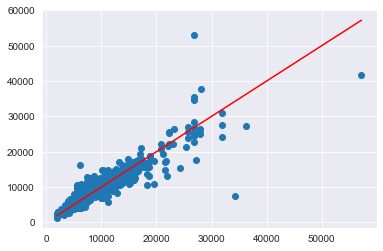



****************************************************************************************************





RandomForest Regressor


Training score : 0.9802


Test Score : 0.8758


K-fold accuracy : 0.8750


Standard Deviation of Accuracies in k-fold : 0.0339


Mean Absolute Error : 700.9640


Root Mean Squared Error : 1636.4863


Mean Squared Log Error : 0.0188


R2_score : 87.5796




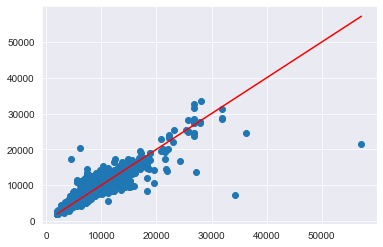



****************************************************************************************************





In [49]:

pre_final = []
for i in models:
    sam = metrics(i , X_train , y_train , X_test , y_test)
    pre_final.append(sam)
    

In [50]:
data_pre_final = [x[0] for x in pre_final]
data_pre_final

[['XGBRegressor',
  0.9633100162765501,
  0.890700259084509,
  0.8863068816298899,
  0.028892155349065963,
  803.0080326492674,
  1535.1635645220695,
  0.01757039331309828,
  89.0700259084509],
 ['RandomForest Regressor',
  0.980191566628511,
  0.8757962819997156,
  0.8749668193421316,
  0.03392263130753511,
  700.9640137616893,
  1636.4863467784994,
  0.018751176808459096,
  87.57962819997157]]

In [51]:
me = pd.DataFrame(data_pre_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "MAE" , "RMSE" , "MLSE" , "R2_Score"])

me.sort_values(by = ["R2_Score" , "MLSE" , "RMSE" , "K-fold Accuracy" , "MAE" , "Train Score" , "Test Score"] , inplace = True , ascending = (False , True , True , False , True , False , False))
me = me.reset_index(drop = True)
me

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,MAE,RMSE,MLSE,R2_Score
0,XGBRegressor,0.963310,0.890700,0.886307,0.028892,803.008033,1535.163565,0.017570,89.070026
1,RandomForest Regressor,0.980192,0.875796,0.874967,0.033923,700.964014,1636.486347,0.018751,87.579628


In [52]:
def feature_importance(model , X_train , y_train):
    features = model.feature_importances_
    print(f"Feature importance list : \n" , features)
    print("\n")
    plt.figure(figsize = (15 , 8))
    sns.barplot(X_train.columns.tolist() , features)
    plt.show()
    print("\n")
    print("*"*100)
    print("\n")
    return list(zip(features , X_train.columns))

In [53]:
xgb = XGBRegressor(random_state = 42 , objective ='reg:squarederror' , n_estimators = 200)
xgb.fit(X_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

Feature importance list : 
 [4.7328379e-02 3.1645924e-02 2.1861698e-02 1.2482423e-02 5.9878030e-03
 5.4416708e-03 1.2769531e-02 1.9286776e-02 1.0115906e-02 2.7078573e-02
 1.1568973e-01 4.0504667e-01 3.9515626e-02 1.4214400e-02 1.8490193e-02
 4.4312110e-04 1.4501518e-02 2.5680484e-04 1.4629253e-02 5.2949758e-03
 9.0267761e-03 1.5794007e-02 7.3632305e-03 0.0000000e+00 0.0000000e+00
 7.7047055e-03 0.0000000e+00 0.0000000e+00 1.1231787e-02 5.1437034e-03
 4.8862835e-03 7.7327760e-03 4.1996155e-02 3.3695432e-03 6.0892351e-02
 2.5280432e-03 1.8606200e-04 6.3644409e-05]




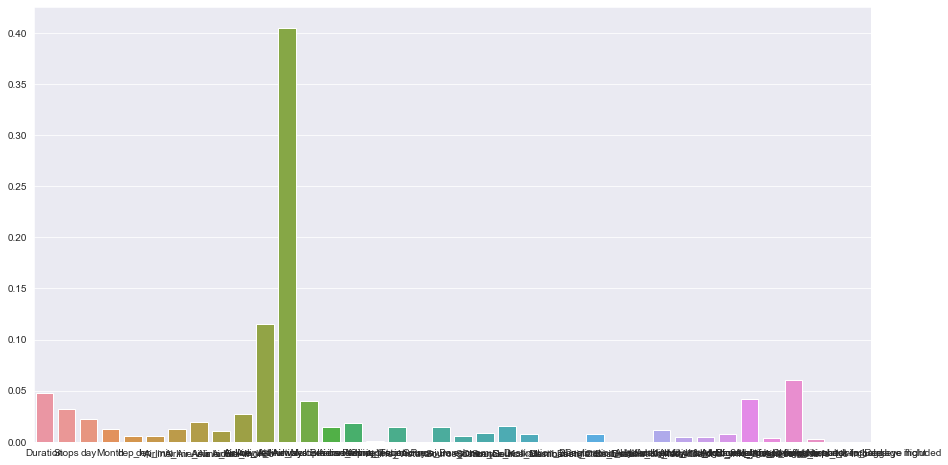



****************************************************************************************************




In [54]:
xgb_fi = feature_importance(xgb , X_train , y_train)

In [55]:
xgb_df = pd.DataFrame(xgb_fi , columns = ["Feature Importances" , "Feartures"]).sort_values(by = ["Feature Importances"] , ascending = False).reset_index(drop = True)

In [56]:
xgb_df

,Feature Importances,Feartures
0,0.405047,Airline_Jet Airways Business
1,0.115690,Airline_Jet Airways
2,0.060892,Additional_Info_In-flight meal not included
3,0.047328,Duration
4,0.041996,Additional_Info_Business class
5,0.039516,Airline_Multiple carriers
6,0.031646,Stops
7,0.027079,Airline_IndiGo
8,0.021862,day
9,0.019287,Airline_Air India


In [57]:
X.drop(["Destination_Banglore" , "Destination_Kolkata" , "Destination_Hyderabad" , "Destination_Cochin"] , axis = 1 , inplace = True)

In [58]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

for i in ['Duration','day','Month','dep_hr','dep_min']:
    X_train[i] = np.log(X_train[i] + 1)
    X_test[i] = np.log(X_test[i] + 1)
scaler = StandardScaler()

scale_cols = ["Duration" , "day" , "Month" , "dep_hr" , "dep_min"]
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])



XGBRegressor


Training score : 0.9633


Test Score : 0.8907


K-fold accuracy : 0.8863


Standard Deviation of Accuracies in k-fold : 0.0289


Mean Absolute Error : 803.0080


Root Mean Squared Error : 1535.1636


Mean Squared Log Error : 0.0176


R2_score : 89.0700




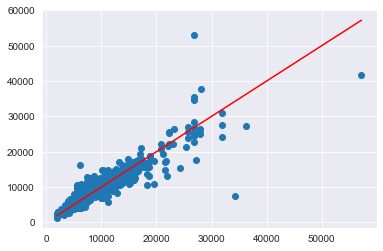



****************************************************************************************************





RandomForest Regressor


Training score : 0.9804


Test Score : 0.8761


K-fold accuracy : 0.8753


Standard Deviation of Accuracies in k-fold : 0.0334


Mean Absolute Error : 699.0450


Root Mean Squared Error : 1634.3922


Mean Squared Log Error : 0.0187


R2_score : 87.6114




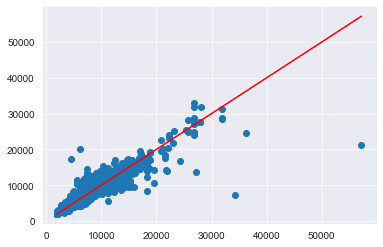



****************************************************************************************************





In [59]:
final = []
for i in models:
    sam = metrics(i , X_train , y_train , X_test , y_test)
    final.append(sam)

In [60]:
data_final = [x[0] for x in final]
data_final


[['XGBRegressor',
  0.9633100162765501,
  0.890700259084509,
  0.8863068816298899,
  0.028892155349065963,
  803.0080326492674,
  1535.1635645220695,
  0.01757039331309828,
  89.0700259084509],
 ['RandomForest Regressor',
  0.9803794139039987,
  0.876113960997095,
  0.8753451325226577,
  0.033405347343273745,
  699.0449665400242,
  1634.3921655337008,
  0.018701468831612732,
  87.61139609970951]]

In [61]:
# After Removing useless columns

mef = pd.DataFrame(data_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "MAE" , "RMSE" , "MLSE" , "R2_Score"])

mef.sort_values(by = ["R2_Score" , "MLSE" , "RMSE" , "K-fold Accuracy" , "MAE" , "Train Score" , "Test Score"] , inplace = True , ascending = (False , True , True , False , True , False , False))
mef = mef.reset_index(drop = True)
mef

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,MAE,RMSE,MLSE,R2_Score
0,XGBRegressor,0.963310,0.890700,0.886307,0.028892,803.008033,1535.163565,0.017570,89.070026
1,RandomForest Regressor,0.980379,0.876114,0.875345,0.033405,699.044967,1634.392166,0.018701,87.611396


# final Model 

Feature importance list : 
 [4.73283716e-02 3.16459201e-02 2.18616966e-02 1.24824224e-02
 5.98780205e-03 5.44167031e-03 1.27695305e-02 1.92867741e-02
 1.01159047e-02 2.70785708e-02 1.15689717e-01 4.05046612e-01
 3.95156220e-02 1.42143993e-02 1.84901915e-02 4.43121069e-04
 1.45015158e-02 2.56804808e-04 1.46292523e-02 5.29497536e-03
 9.02677514e-03 1.57940052e-02 7.36322999e-03 7.70470500e-03
 1.12317856e-02 5.14370296e-03 4.88628307e-03 7.73277553e-03
 4.19961512e-02 3.36954277e-03 6.08923472e-02 2.52804300e-03
 1.86061981e-04 6.36444020e-05]




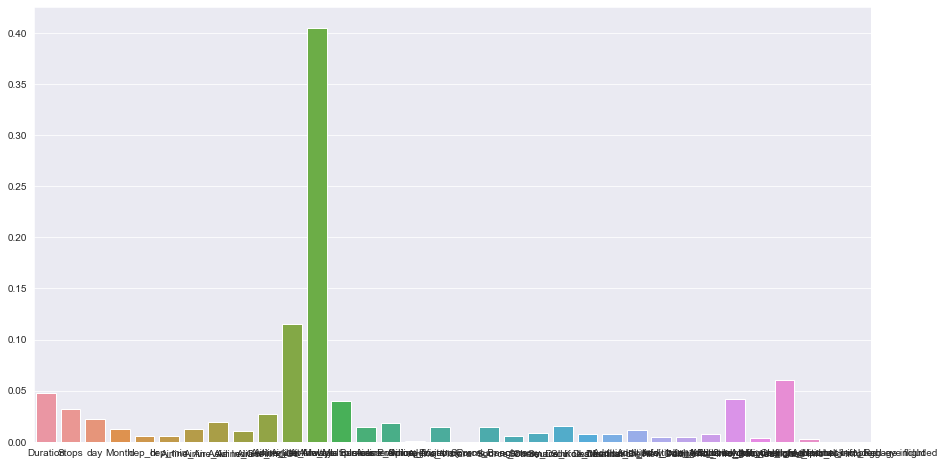



****************************************************************************************************




In [62]:
xgb = XGBRegressor(random_state = 42 , objective ='reg:squarederror' , n_estimators = 200)
xgb.fit(X_train , y_train)

xgb_fi = feature_importance(xgb , X_train , y_train)

In [63]:
xgb_df = pd.DataFrame(xgb_fi , columns = ["Feature Importances" , "Feartures"]).sort_values(by = ["Feature Importances"] , ascending = False).reset_index(drop = True)

In [64]:
xgb_df

,Feature Importances,Feartures
0,0.405047,Airline_Jet Airways Business
1,0.115690,Airline_Jet Airways
2,0.060892,Additional_Info_In-flight meal not included
3,0.047328,Duration
4,0.041996,Additional_Info_Business class
5,0.039516,Airline_Multiple carriers
6,0.031646,Stops
7,0.027079,Airline_IndiGo
8,0.021862,day
9,0.019287,Airline_Air India


In [65]:
preds = xgb.predict(X_test)
preds

array([15925.701 ,  6398.8535,  8377.597 , ...,  6578.9106,  8809.068 ,
       13735.027 ], dtype=float32)

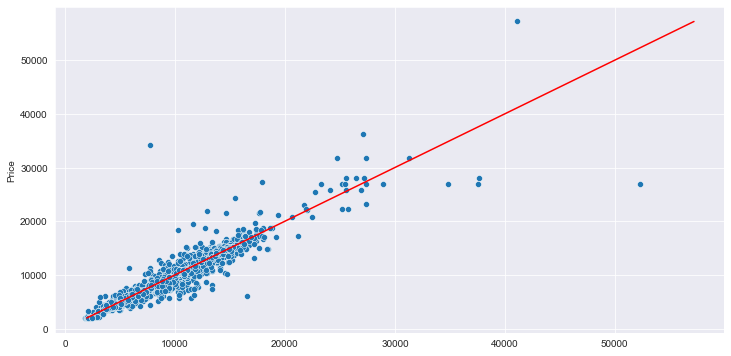

In [66]:
plt.figure(figsize = (12 , 6))
sns.scatterplot(preds , y_test)
x = np.linspace(min(y_test) , max(y_test) , 100)
y = x
plt.plot(x, y , "-r")

<AxesSubplot:xlabel='Price', ylabel='Density'>

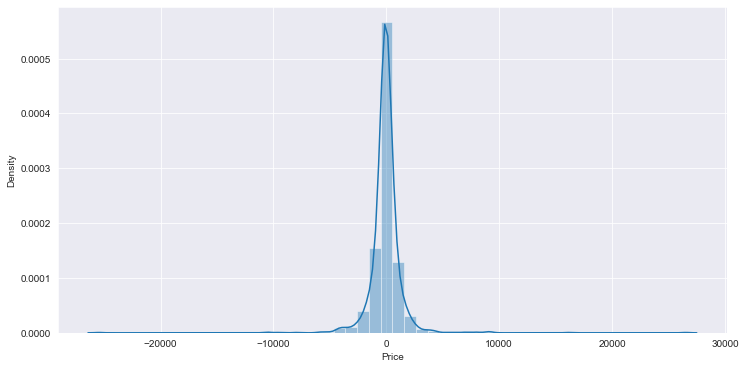

In [67]:
plt.figure(figsize = (12 , 6))
sns.distplot(y_test - preds)

In [68]:
from pickle import dump
dump(xgb , open('model.pkl', 'wb'))


In [71]:
dump(scaler, open("Scaler.pkl", 'wb'))